In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv("ckd.csv")

In [3]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,6,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,7,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,8,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,9,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,10,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [4]:
df.isnull().sum()

id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [5]:
df.drop(columns="id",inplace= True)

In [6]:
df["class"] = df["class"].replace(to_replace="no", value = "notckd")
df["class"] = df["class"].replace(to_replace="ckd", value = 1)
df["class"] = df["class"].replace(to_replace="notckd", value = 0)

df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,0


In [7]:
x=df["class"].unique()
x.sort()
x

array([0, 1], dtype=int64)

In [8]:
def feature_before_imputation(col):
    df1= df[[col,"class"]]
    df1.dropna()
    df1[[col,"class"]].groupby("class").mean().iloc[:,0]
    sns.barplot(x=x, y=df1[[col,"class"]].groupby("class").mean().iloc[:,0],data=df1)
    plt.title("{} vs Class".format(col))
    plt.show()

In [9]:
def feature_after_imputation(col):
    print("Average Value:",df[col].mean())
    df1= df[[col,"class"]]
    df1[col]=df1[col].fillna(df1[col].mean())
    sns.barplot(x=x, y=df1[[col,"class"]].groupby("class").mean().iloc[:,0],data=df1)
    plt.title("{} vs Class".format(col))
    plt.show()

In [10]:
cont_features= ['age', 'bp','bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv','wbcc', 'rbcc']

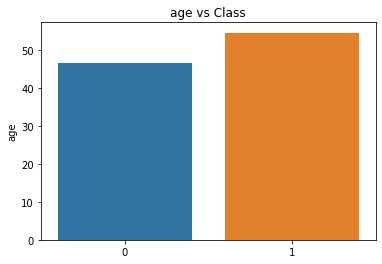

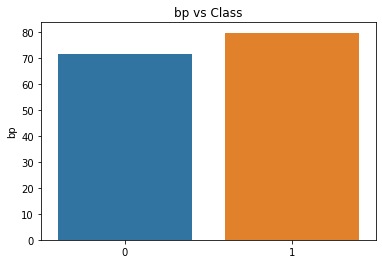

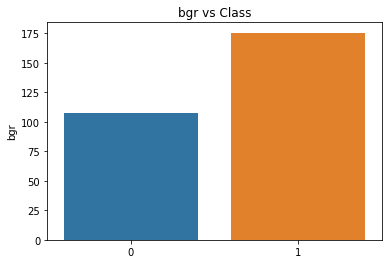

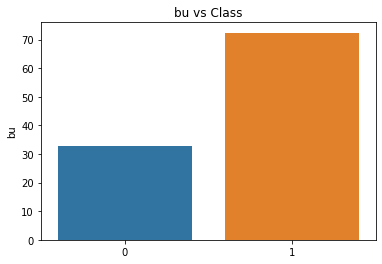

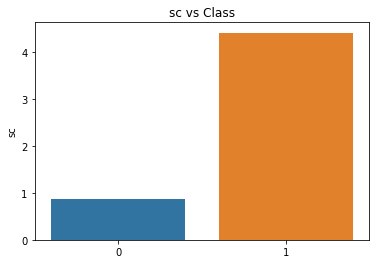

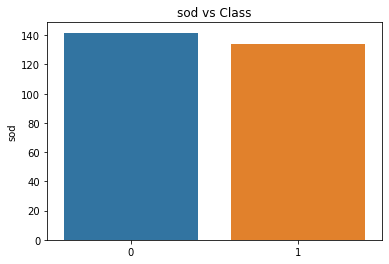

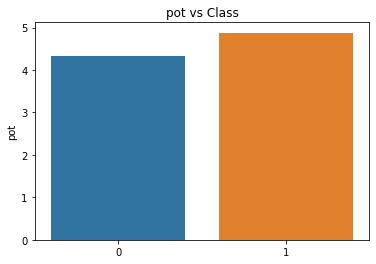

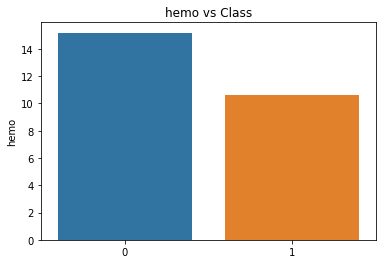

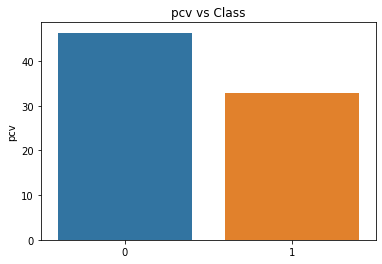

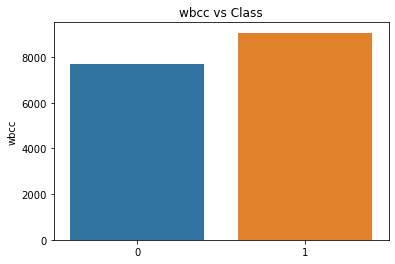

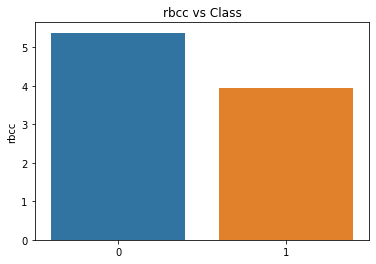

In [11]:
for row in (cont_features):
    feature_before_imputation(row)

Continious Features After Applying Average Imputation
Average Value: 51.48337595907928


<ipython-input-9-c950a192d6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].fillna(df1[col].mean())


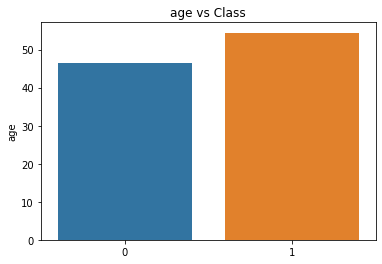

Continious Features After Applying Average Imputation
Average Value: 76.46907216494846


<ipython-input-9-c950a192d6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].fillna(df1[col].mean())


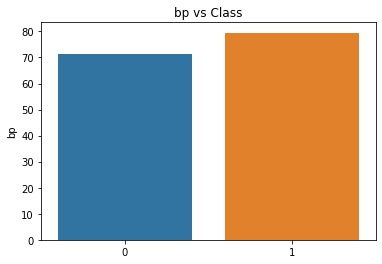

Continious Features After Applying Average Imputation
Average Value: 148.0365168539326


<ipython-input-9-c950a192d6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].fillna(df1[col].mean())


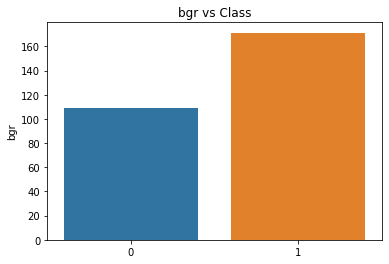

Continious Features After Applying Average Imputation
Average Value: 57.425721784776904


<ipython-input-9-c950a192d6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].fillna(df1[col].mean())


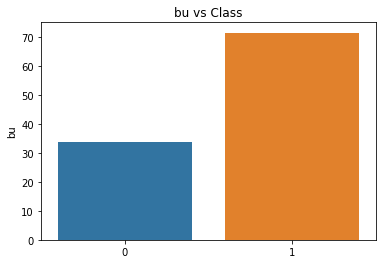

Continious Features After Applying Average Imputation
Average Value: 3.0724543080939934


<ipython-input-9-c950a192d6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].fillna(df1[col].mean())


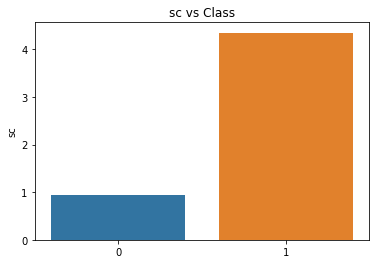

Continious Features After Applying Average Imputation
Average Value: 137.52875399361022


<ipython-input-9-c950a192d6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].fillna(df1[col].mean())


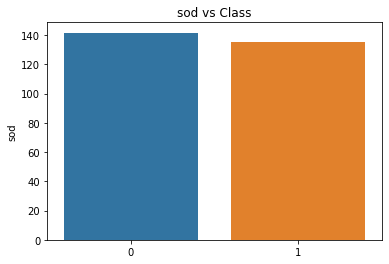

Continious Features After Applying Average Imputation
Average Value: 4.627243589743592


<ipython-input-9-c950a192d6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].fillna(df1[col].mean())


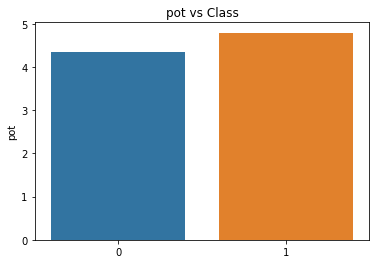

Continious Features After Applying Average Imputation
Average Value: 12.526436781609195


<ipython-input-9-c950a192d6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].fillna(df1[col].mean())


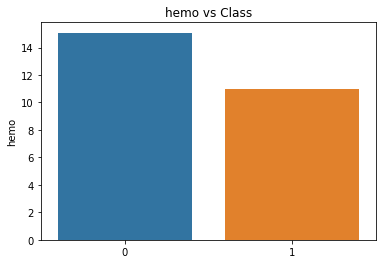

Continious Features After Applying Average Imputation
Average Value: 38.88449848024316


<ipython-input-9-c950a192d6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].fillna(df1[col].mean())


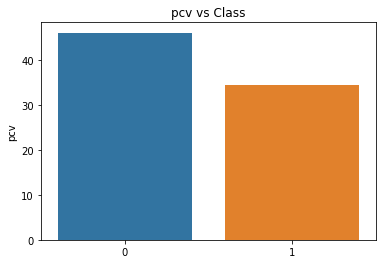

Continious Features After Applying Average Imputation
Average Value: 8406.122448979591


<ipython-input-9-c950a192d6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].fillna(df1[col].mean())


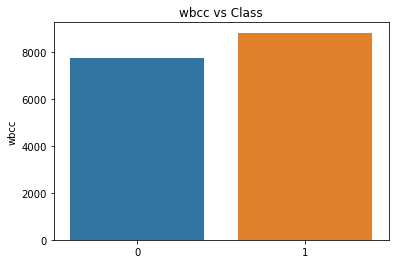

Continious Features After Applying Average Imputation
Average Value: 4.707434944237919


<ipython-input-9-c950a192d6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].fillna(df1[col].mean())


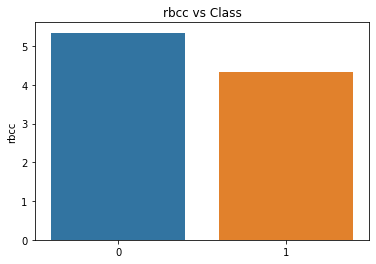

In [12]:
# checking dataset values after applying mean imputation
for row in (cont_features):
    print("Continious Features After Applying Average Imputation")
    feature_after_imputation(row)

In [13]:
df[df["wbcc"].isnull()].tail(50)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
143,41.0,80.0,1.015,1.0,4.0,abnormal,normal,notpresent,notpresent,210.0,...,NaN,NaN,NaN,no,yes,no,good,no,no,1
146,53.0,100.0,1.010,1.0,3.0,abnormal,normal,notpresent,notpresent,213.0,...,NaN,NaN,NaN,no,yes,no,good,no,no,1
148,69.0,60.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,171.0,...,NaN,NaN,NaN,yes,no,no,poor,no,no,1
149,65.0,70.0,1.020,1.0,0.0,abnormal,abnormal,notpresent,notpresent,139.0,...,32.0,NaN,NaN,yes,no,no,good,yes,no,1
151,76.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,172.0,...,30.0,NaN,NaN,yes,yes,no,good,no,yes,1
152,39.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,32.0,NaN,NaN,no,yes,no,good,no,no,1
154,56.0,90.0,1.005,4.0,3.0,abnormal,abnormal,notpresent,notpresent,242.0,...,26.0,NaN,3.0,yes,yes,no,poor,yes,yes,1
156,66.0,90.0,1.015,2.0,0.0,NaN,normal,notpresent,present,153.0,...,NaN,NaN,NaN,no,no,no,poor,no,no,1
158,71.0,60.0,1.020,3.0,2.0,normal,normal,present,notpresent,424.0,...,31.0,NaN,NaN,yes,yes,yes,good,no,no,1
165,60.0,80.0,1.020,0.0,2.0,NaN,NaN,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,yes,no,good,no,no,1


replacing Nan with the mean value did not introduce change in distibution. so proceeding with mean imputation for continious values 

In [14]:
# function to impute continious values with the fearture's mean value
def impute_features(col):
    df[col]= df[col].fillna(df[col].mean())

In [15]:
#Mean imputation

for row in (cont_features):
    impute_features(row)

All continious feature have effect on target value. retaining all the features  

In [16]:
df["class"].value_counts()

1    250
0    150
Name: class, dtype: int64

In [17]:
df.isnull().sum()

age        0
bp         0
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wbcc       0
rbcc       0
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [18]:
list(df['su'].unique())

[0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0]

In [19]:
# list of features with ordinal data.

ordinal_columns=["su",'sg','al']

In [20]:
# to know how the features impact the target ckd and not ckd.
def ordinal_Feature(col):
    print("With and without ckd for each value of {}".format(col))
    val= list(df[col].unique())
    for i in val:
        print ("{} value: {}".format(col,i))
        count_dict=dict(df[df[col]==i]["class"].value_counts())
        print(count_dict)
    sns.countplot(x=col,hue="class",data=df)
    plt.title("{} vs Class".format(col))
    plt.show()

With and without ckd for each value of su
su value: 0.0
{1: 145, 0: 145}
su value: 3.0
{1: 14}
su value: 4.0
{1: 13}
su value: 1.0
{1: 13}
su value: nan
{}
su value: 2.0
{1: 18}
su value: 5.0
{1: 3}


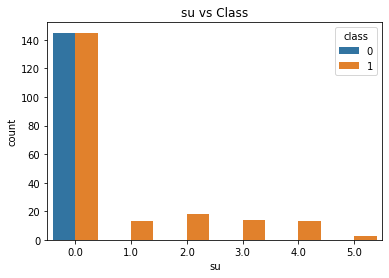

With and without ckd for each value of sg
sg value: 1.02
{0: 75, 1: 31}
sg value: 1.01
{1: 84}
sg value: 1.005
{1: 7}
sg value: 1.015
{1: 75}
sg value: nan
{}
sg value: 1.025
{0: 70, 1: 11}


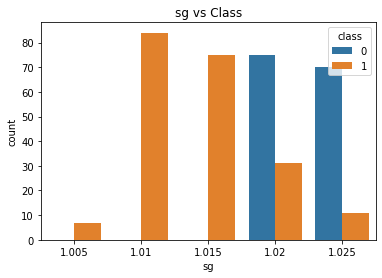

With and without ckd for each value of al
al value: 1.0
{1: 44}
al value: 4.0
{1: 24}
al value: 2.0
{1: 43}
al value: 3.0
{1: 43}
al value: 0.0
{0: 145, 1: 54}
al value: nan
{}
al value: 5.0
{1: 1}


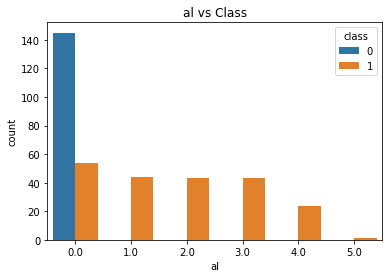

In [21]:
for i in (ordinal_columns):
    ordinal_Feature(i)

Looking at the plot the sugar level has much lower effect on CKD since equal no of patients with Sugar level 0 have CKD and WITH OUT CKD. so this feature can be removed

In [22]:
# the values of "su" has no effect on the class. So dropping the feature.

df.drop(columns="su",inplace= True)

From the plot it is evident that the Patients with no CKD have specific gravity level among 1.02 and 1.025 and those who with CKD have sp between 1.015 and below.

So the nan values in sp feature for class 0 can be replaced with 1.02 and 
The nan values in sp feature for class 1 can be replaced with 1.01.


In [23]:
for i in (df.index):
    if((df.loc[i,"class"]==1) & (pd.isnull(df.loc[i,'sg']))):
        df.loc[i,"sg"]=1.01
    elif ((df.loc[i,"class"]==0) & (pd.isnull(df.loc[i,'sg']))):
        df.loc[i,'sg']=1.02


From the plot it is evident that the Patients with no CKD have Albumin level among 0 and those who with CKD have greater than 0.

So the nan values in sp feature for class 0 can be replaced with 0 and 
The nan values in sp feature for class 1 can be replaced with 3.

In [24]:
for i in (df.index):
    if((df.loc[i,"class"]==1) & (pd.isnull(df.loc[i,'al']))):
        df.loc[i,"al"]=3
    elif ((df.loc[i,"class"]==0) & (pd.isnull(df.loc[i,'al']))):
        df.loc[i,'al']=0


Plot After imputation

With and without ckd for each value of sg
sg value: 1.02
{0: 80, 1: 31}
sg value: 1.01
{1: 126}
sg value: 1.005
{1: 7}
sg value: 1.015
{1: 75}
sg value: 1.025
{0: 70, 1: 11}


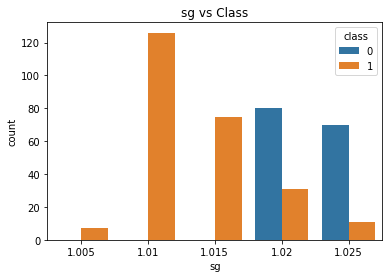

With and without ckd for each value of al
al value: 1.0
{1: 44}
al value: 4.0
{1: 24}
al value: 2.0
{1: 43}
al value: 3.0
{1: 84}
al value: 0.0
{0: 150, 1: 54}
al value: 5.0
{1: 1}


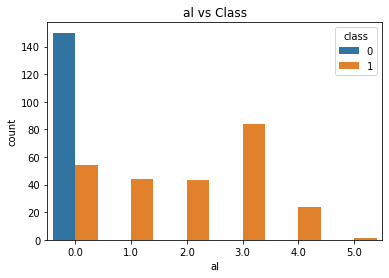

In [25]:
for i in (['sg','al']):
    ordinal_Feature(i)

In [26]:
df.isnull().sum()

age        0
bp         0
sg         0
al         0
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wbcc       0
rbcc       0
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

Imputing categorical features - rbc and pc 

With and without ckd for each value of pc
pc value: normal
{0: 141, 1: 118}
pc value: abnormal
{1: 76}
pc value: nan
{}


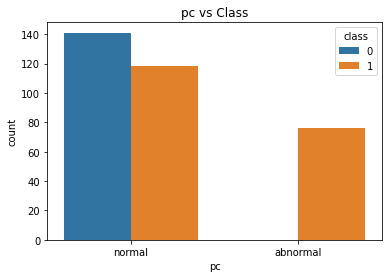

In [27]:
#getting count for each target with respect to pc
ordinal_Feature("pc")

In [28]:
#imputing

for i in (df.index):
    if((df.loc[i,"class"]==1) & (pd.isnull(df.loc[i,'pc']))):
        df.loc[i,"pc"]="abnormal"
    elif ((df.loc[i,"class"]==0) & (pd.isnull(df.loc[i,'pc']))):
        df.loc[i,'pc']="normal"


With and without ckd for each value of pc
pc value: normal
{0: 150, 1: 118}
pc value: abnormal
{1: 132}


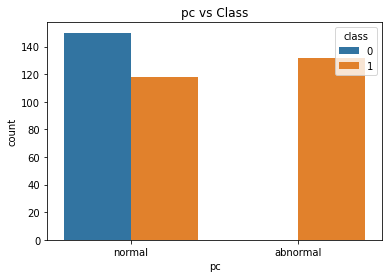

In [29]:
#getting count for each target with respect to pc after imputation
ordinal_Feature("pc")

With and without ckd for each value of rbc
rbc value: nan
{}
rbc value: normal
{0: 141, 1: 60}
rbc value: abnormal
{1: 47}


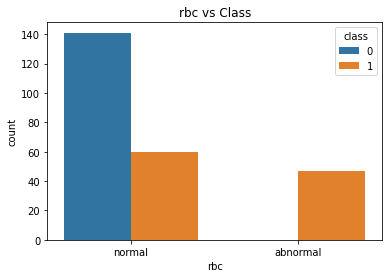

In [30]:
#getting count for each target with respect to rbc
ordinal_Feature("rbc")

In [31]:
for i in (df.index):
    if((df.loc[i,"class"]==1) & (pd.isnull(df.loc[i,'rbc']))):
        df.loc[i,"rbc"]="abnormal"
    elif ((df.loc[i,"class"]==0) & (pd.isnull(df.loc[i,'rbc']))):
        df.loc[i,'rbc']="normal"

With and without ckd for each value of rbc
rbc value: abnormal
{1: 190}
rbc value: normal
{0: 150, 1: 60}


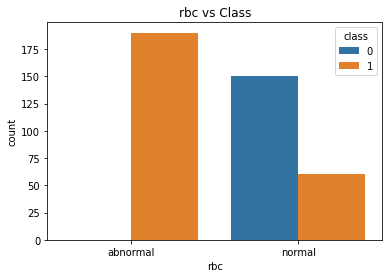

In [32]:
#getting count for each target with respect to rbc after imputation
ordinal_Feature("rbc")

In [33]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
rbc      0
pc       0
pcc      4
ba       4
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      2
dm       3
cad      2
appet    1
pe       1
ane      1
class    0
dtype: int64

removing remaining null values by dropping. since they are very low in number and dropping them will not affect the data 

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [36]:
df

,age,bp,sg,al,rbc,pc,pcc,ba,bgr,bu,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,abnormal,normal,notpresent,notpresent,121.000000,36.0,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,abnormal,normal,notpresent,notpresent,148.036517,18.0,...,38.0,6000.0,4.707435,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,normal,normal,notpresent,notpresent,423.000000,53.0,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,normal,abnormal,present,notpresent,117.000000,56.0,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,normal,normal,notpresent,notpresent,106.000000,26.0,...,35.0,7300.0,4.600000,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,normal,normal,notpresent,notpresent,140.000000,49.0,...,47.0,6700.0,4.900000,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,normal,normal,notpresent,notpresent,75.000000,31.0,...,54.0,7800.0,6.200000,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,normal,normal,notpresent,notpresent,100.000000,26.0,...,49.0,6600.0,5.400000,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,normal,normal,notpresent,notpresent,114.000000,50.0,...,51.0,7200.0,5.900000,no,no,no,good,no,no,0


In [37]:
df["class"].value_counts()

1    250
0    142
Name: class, dtype: int64

Analysing remaining categorical features

In [38]:
categorical_columns= [col for col in df.columns if df[col].dtype=="O"]
categorical_columns

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

With and without ckd for each value of rbc
rbc value: abnormal
{1: 190}
rbc value: normal
{0: 142, 1: 60}


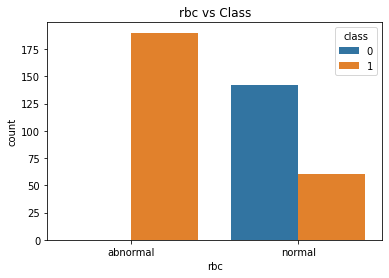

With and without ckd for each value of pc
pc value: normal
{0: 142, 1: 118}
pc value: abnormal
{1: 132}


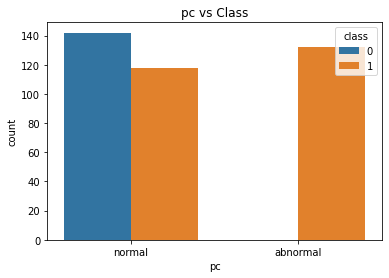

With and without ckd for each value of pcc
pcc value: notpresent
{1: 208, 0: 142}
pcc value: present
{1: 42}


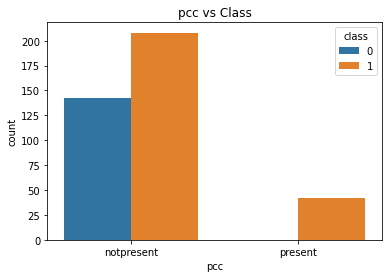

With and without ckd for each value of ba
ba value: notpresent
{1: 228, 0: 142}
ba value: present
{1: 22}


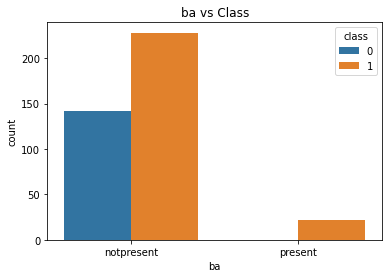

With and without ckd for each value of htn
htn value: yes
{1: 147}
htn value: no
{0: 142, 1: 103}


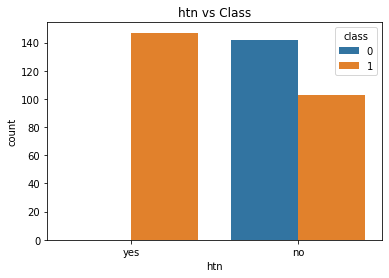

With and without ckd for each value of dm
dm value: yes
{1: 137}
dm value: no
{0: 142, 1: 113}


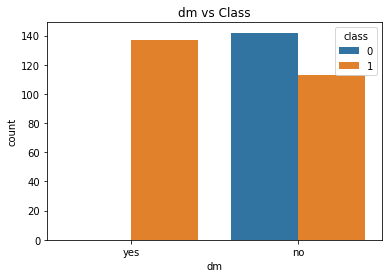

With and without ckd for each value of cad
cad value: no
{1: 216, 0: 142}
cad value: yes
{1: 34}


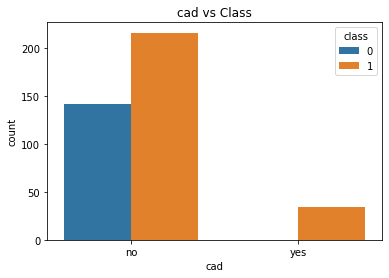

With and without ckd for each value of appet
appet value: good
{1: 168, 0: 142}
appet value: poor
{1: 82}


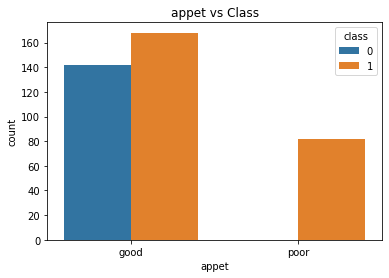

With and without ckd for each value of pe
pe value: no
{1: 174, 0: 142}
pe value: yes
{1: 76}


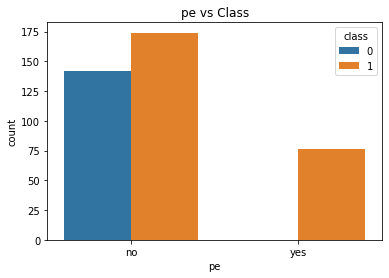

With and without ckd for each value of ane
ane value: no
{1: 190, 0: 142}
ane value: yes
{1: 60}


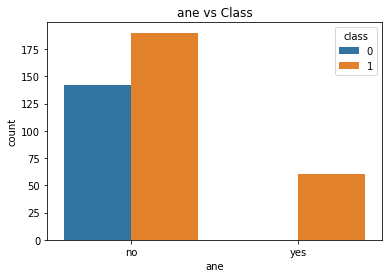

In [39]:
for i in categorical_columns:
    ordinal_Feature(i)

In [40]:
# dropping them since they have no effect on the target, adding them will confuse the model.

df.drop(columns=['pcc', 'ba', 'cad','appet','pe','ane'],inplace=True)

In [41]:
df

,age,bp,sg,al,rbc,pc,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,class
0,48.0,80.0,1.020,1.0,abnormal,normal,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,1
1,7.0,50.0,1.020,4.0,abnormal,normal,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,no,no,1
2,62.0,80.0,1.010,2.0,normal,normal,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,yes,1
3,48.0,70.0,1.005,4.0,normal,abnormal,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,no,1
4,51.0,80.0,1.010,2.0,normal,normal,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,normal,normal,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,no,no,0
396,42.0,70.0,1.025,0.0,normal,normal,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,no,no,0
397,12.0,80.0,1.020,0.0,normal,normal,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,no,no,0
398,17.0,60.0,1.025,0.0,normal,normal,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,no,no,0


In [42]:
df_onehot = pd.get_dummies(df, columns = ['rbc', 'pc','htn','dm'],drop_first=True)

In [43]:
df_onehot

,age,bp,sg,al,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class,rbc_normal,pc_normal,htn_yes,dm_yes
0,48.0,80.0,1.020,1.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,0,1,1,1
1,7.0,50.0,1.020,4.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,1,0,1,0,0
2,62.0,80.0,1.010,2.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,1,1,1,0,1
3,48.0,70.0,1.005,4.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,1,0,1,0
4,51.0,80.0,1.010,2.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,0,1,1,0,0
396,42.0,70.0,1.025,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,0,1,1,0,0
397,12.0,80.0,1.020,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,0,1,1,0,0
398,17.0,60.0,1.025,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,0,1,1,0,0


In [44]:
# creating target and train data
X = df_onehot.drop(columns=["class"])
y=df_onehot["class"]

# Dividing the data into test and train dataset

# Create the Test and Final Training Datasets

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42,shuffle=True)

In [45]:
# Decision Tree

from sklearn import tree

model=tree.DecisionTreeClassifier()

model.fit(x_train,y_train)

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

1.0
1.0


In [46]:
path=model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [47]:
ccp_alphas

array([0.        , 0.02127216, 0.11082108, 0.33527316])

In [48]:
train_acc=[]
test_acc=[]

for cc_alpha in ccp_alphas:
    model=tree.DecisionTreeClassifier(ccp_alpha=cc_alpha)

    model.fit(x_train,y_train)
    print("For ccpalpha: {} - Train Accuracy={}, Test Accuracy={}".format(cc_alpha,model.score(x_train,y_train),model.score(x_test,y_test)))
    train_acc.append(model.score(x_train,y_train))
    test_acc.append(model.score(x_test,y_test))

For ccpalpha: 0.0 - Train Accuracy=1.0, Test Accuracy=1.0
For ccpalpha: 0.02127215849843587 - Train Accuracy=0.9890510948905109, Test Accuracy=0.9491525423728814
For ccpalpha: 0.11082108379023847 - Train Accuracy=0.9197080291970803, Test Accuracy=0.8305084745762712
For ccpalpha: 0.33527315975725247 - Train Accuracy=0.6277372262773723, Test Accuracy=0.6610169491525424


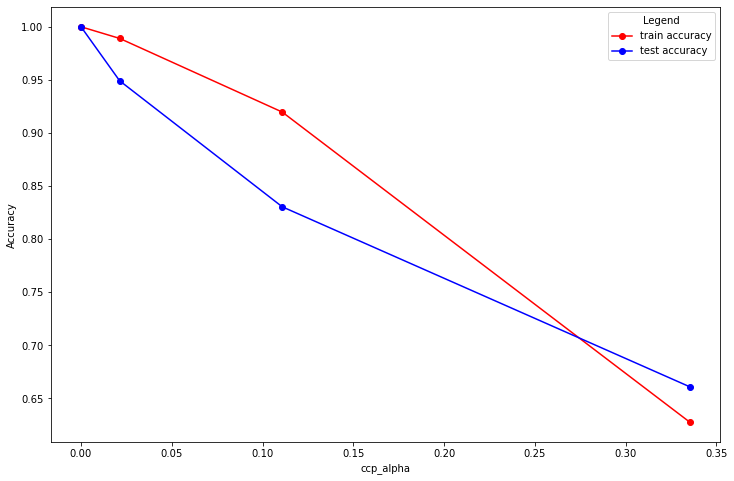

In [49]:
plt.figure(figsize=(12,8))
plt.plot(ccp_alphas[:],train_acc[:],'ro-',label = "train accuracy")
plt.plot(ccp_alphas[:],test_acc[:],'bo-',label = "test accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend(title = "Legend")
plt.show()

In [50]:
model=tree.DecisionTreeClassifier(ccp_alpha=0.02127215849843587)

model.fit(x_train,y_train)

print("Train Accuracy= {} ".format(model.score(x_train,y_train)))
print("Test Accuracy = {}".format(model.score(x_test,y_test)))

Train Accuracy= 0.9890510948905109 
Test Accuracy = 0.9491525423728814


In [51]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(x_test)


print('Accuracy score for validation test data is:',accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy score for validation test data is: 0.9491525423728814


array([[40,  0],
       [ 6, 72]], dtype=int64)

In [52]:
# validating model with sample data

test_points=[[51.0,80.0,1.010,2.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,1,1,0,0],
             [20.0,30.0,1.020,1.0,50.000000,36.0,1.2,100.528754,8.627244,15.4,10.0,7800.0,1.200000,0,0,0,0],
             [55.0,80.0,1.020,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,1,1,0,0],
             [58.0,80.0,1.025,0.0,131.000000,18.0,1.1,141.000000,3.500000,15.8,53.0,6800.0,6.100000,1,1,0,0]]


In [53]:
prediction= model.predict(test_points)
print(prediction)
lst=[]
for i in prediction:
    if i==1:
        lst.append("CKD")
    else:
        lst.append("Not CKD")
print(lst)   

[1 1 0 0]
['CKD', 'CKD', 'Not CKD', 'Not CKD']


In [54]:
import pickle
file = open("ckd_model.pkl", "wb")
pickle.dump(model, file)